<a href="https://colab.research.google.com/github/najnin26/DL_Algo_Implement/blob/main/CNN/hand_written.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# ***Loading MNIST dataset***

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

# ***Divide into Train and Test***

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

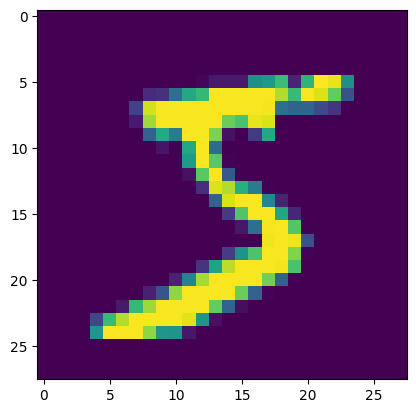

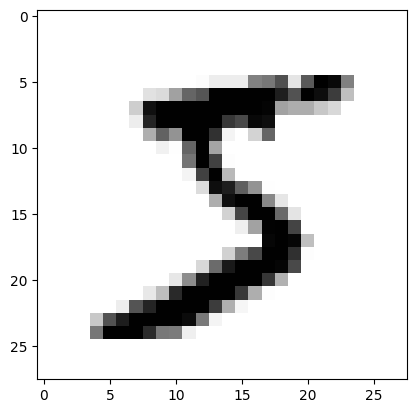

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

# ***Checking the value of each pixel***

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# ***Normalizing Data | Pre-processing***

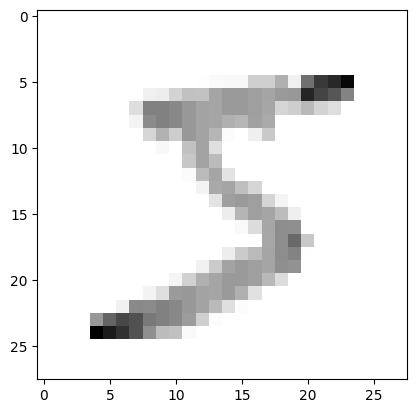

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


## ***Resizing image to make it suitable for apply CNN***

In [ ]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training sample dimension",x_trainr.shape )
print("Testing sample dimension",x_testr.shape )

Training sample dimension (60000, 28, 28, 1)
Testing sample dimension (10000, 28, 28, 1)


# ***Creating a Deep Learning Network***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
###Creating a neural network
model=Sequential()

###First Convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

###Second Convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

###Third Convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

###Fully Connected Layer-1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

###Fully Connected Layer-2
model.add(Dense(32))
model.add(Activation('relu'))

###Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 71s 52ms/step - accuracy: 0.7718 - loss: 0.6767 - val_accuracy: 0.9453 - val_loss: 0.1743
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9648 - loss: 0.1135 - val_accuracy: 0.9727 - val_loss: 0.0876
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9751 - loss: 0.0817 - val_accuracy: 0.9737 - val_loss: 0.0843
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 68s 51ms/step - accuracy: 0.9818 - loss: 0.0576 - val_accuracy: 0.9809 - val_loss: 0.0668
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9833 - loss: 0.0486 - val_accuracy: 0.9815 - val_loss: 0.0639


In [ ]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test Loss",test_loss)
print("Test Accuracy",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9792 - loss: 0.0699
Test Loss 0.059733759611845016
Test Accuracy 0.9828000068664551


In [ ]:
predictions=model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [ ]:
print(predictions)

[[2.8788586e-08 8.9436787e-07 4.0823797e-06 ... 9.9999064e-01
  9.1176034e-08 1.6503652e-06]
 [1.9715921e-05 6.7269220e-08 9.9997085e-01 ... 5.5439427e-06
  1.9925137e-08 2.3936128e-08]
 [1.4491632e-04 9.9979258e-01 9.5771600e-07 ... 5.5030006e-05
  3.9037168e-08 9.4328794e-07]
 ...
 [1.4059899e-09 7.5128111e-05 9.7719851e-07 ... 3.2683671e-05
  3.8689053e-05 5.8679376e-05]
 [8.5059902e-08 9.3998498e-10 1.3536137e-10 ... 2.7148145e-10
  3.0427242e-05 1.2927063e-07]
 [3.5156700e-05 6.6795013e-07 3.0061271e-04 ... 3.1120504e-07
  1.7917430e-04 2.6171603e-05]]


In [ ]:
print(np.argmax(predictions[0]))

7


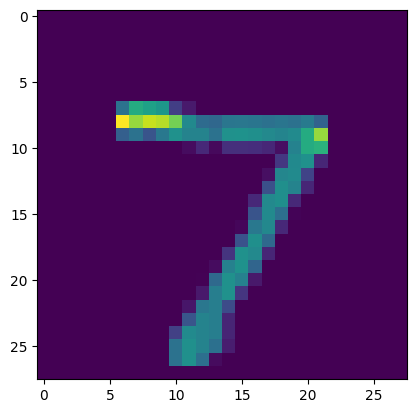

In [ ]:
plt.imshow(x_test[0])

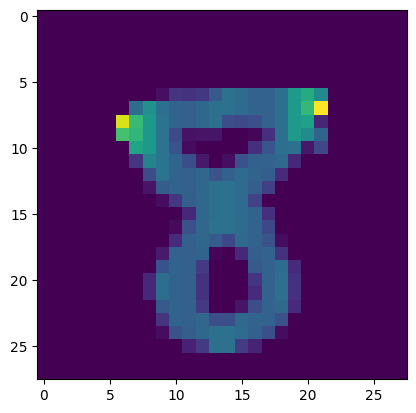

In [ ]:
plt.imshow(x_test[128])

In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img=cv2.imread('/content/drive/MyDrive/ML And QML/DL/CNN/Screenshot 2024-08-19 211545.png')

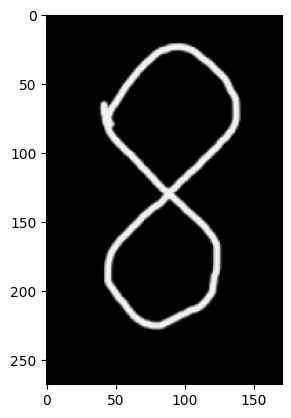

In [ ]:
plt.imshow(img)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [ ]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [ ]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
predict=model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
print(np.argmax(predict))

8
